<a href="https://colab.research.google.com/github/nabila-zurain/First-Project/blob/main/linear_Regression_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SUPERVISED MACHINE LEARNING
# Simple Linear Regression
# First Project : Predict student marks on the basis of number of hours studied
# Linear Regression is a basic and commonly used type of predictive analysis
# Linear Regression is an attempt to model the relationship between two variables by fitting
# a linear equation to observe data

In [ ]:
st='helloworld'
print(st[:5])
t=12,20,'s'
print(type(t))
r=[1,2,3]
r.pop(1)

hello
<class 'tuple'>


2

In [ ]:
# Step 1: Data gathering
# Load the dataset

import pandas as pd

from google.colab import files
upload = files.upload()
data = pd.read_csv('Grade_Set_1.csv')
data

Saving Grade_Set_1.csv to Grade_Set_1.csv


,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [ ]:
x,y=5,00

In [ ]:
# Basic Data Exploration
data.columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [ ]:
data.shape

(9, 4)

In [ ]:
# Step 2: Data Preparation
# 1.) Check for missing values
# 2.) Convert categorical values / Non numerical into numerical features
# 3.) Normalization
# 4.) Select dependent and independent variable

In [ ]:
data.isnull().sum()

Hours_Studied    0
Test_Grade       0
Status           0
Result           0
dtype: int64

In [ ]:
# Convert categorical into numerical features
from sklearn.preprocessing import LabelBinarizer #from package import class
# create an object for LableBinarizer Class so it's easy for you to call method of the class and put as parameter
lb = LabelBinarizer()
data.Status = lb.fit_transform(data.Status) #---> convert numerical value. -ve form to 0 and +ve form to 1. Status is column name
# update previous one. if u want to create another column need to use other codes

In [ ]:
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [ ]:
# Normalization
# Changing the scale of a multiple variable into a same range [0-1]
# Why normalization is necessary for machine learning ?
# For machine learning, every dataset does not require normalization.
# It is required only when features have different ranges. So this data does (Grade Set) does not requires normalization
# because range between Hours_Studied and Test_Grade are close.
# Example data that need normalization: salary for different age. Age = 23, Salary = 3000
# MIN-MAX scaling
# Xnorm = (X-XMIN)/(XMAX-XMIN)
# X = 57
# XMIN = 57
# XMAX = 100

# Xnorm = (57-57)/(100-57)
# 57 ==> 0

# Xnorm = (57-57)/(100-57)
# 100 ==> 1

In [ ]:
# Select dependent and independent variable
import numpy as np
x = data.Hours_Studied.values # x saved independent variable. .values will show the output in array format
x = x.reshape(9,1) # need to convert to 2d becasue y=mx+c, the 'x' needs to be in 2d
x

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y = data.Test_Grade.values # no need to convert dependent variable to 2d because the equation y=mx+c, the 'y' is not in 2d
y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [ ]:
# Step 3: Train the dataset
# Choose a model ---> Simple linear regression
# Y'= mx+c
# where,
#       Y'--> predicted values
#       m --> slope/coefficient [Change in the value of Y with respect to X] -how the independent variable can influence the Y
#       x --> Independent Variable
#       c --> intercept [Value of Y when X is zero]

from sklearn.linear_model import LinearRegression #from package import class
#create object
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(x,y) #fit is method under linear regression that will fit/apply the linear model equation(y=mx+c)
#the output is the model after understanding about the data

LinearRegression()

In [ ]:
# Print predicted values
predicted_values = lin_reg.predict(x) #predict is another method under linear regression class
predicted_values
# output e.g if hours studied are 5. the predicted value for test grade is 74.76111
# if hours studied are 7. the predicted value for test grade is 84.79444

array([59.71111111, 64.72777778, 69.74444444, 74.76111111, 79.77777778,
       84.79444444, 89.81111111, 94.82777778, 99.84444444])

In [ ]:
data['predicted_values'] = predicted_values # create a new column named predicted_values by taking values from variable predicted_values
data[['predicted_values','Test_Grade']] # print out --> predicted_values = [[new column , Test_Grade = column contains actual values]]

,predicted_values,Test_Grade
0,59.711111,57
1,64.727778,66
2,69.744444,73
3,74.761111,76
4,79.777778,79
5,84.794444,81
6,89.811111,90
7,94.827778,96
8,99.844444,100


In [ ]:
# Evaluate Model Performance
from sklearn.metrics import r2_score #r2_score is module which determine the score of your model
#r2 (coefficient of determination) regression score function.
accuracy = r2_score(y,predicted_values) # compare actual values with predicted values
print("Accuracy: ",accuracy)

Accuracy:  0.9757431074095347


In [ ]:
# Final Prediction
hrs = float(input('Enter number of hours studied: '))
marks = lin_reg.predict([[hrs]]) # [[]] double square bracket will give result ( ,1) so it applies the rule to ensure the independent variables are 2d
print('Student who studies for',hrs,'hours will going to score',marks,'marks.')

Enter number of hours studied: 3.5
Student who studies for 3.5 hours will going to score [67.23611111] marks.


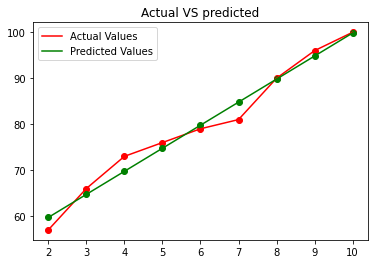

In [ ]:
import matplotlib.pyplot as plt
#plot the actual values
plt.plot(x,y, color = 'red', label = 'Actual Values')
plt.scatter(x,y, color='red')
plt.title('Actual VS predicted')
# plot the predicted values
plt.plot(x,lin_reg.predict(x),color = 'green', label = 'Predicted Values')
plt.scatter(x,lin_reg.predict(x),color='green')
plt.legend()
plt.show()